In [2]:
np.log(99)

4.59511985013459

In [120]:
import numpy as np
import pandas as pd


def woe(x,non_e,ev):
    
    lx = len(x)
    sx = sum(x)
    
    
    if (lx ==sx )or (sx ==0):
        return {'mean':np.log(  (( lx - sx + 0.5)/ non_e )/(( sx + 0.5)/ ev )       ),
            'count':lx,
               'nonevent':( lx - sx + 0.5),
                'nd': non_e ,
                'event': ( sx + 0.5),
                'ed': ev 
                
               
               
               
               }
    
    return {'mean':np.log(  ( lx - sx)/sx),
            'count':lx,
           
               'nonevent':( lx - sx),
                'nd': (non_e+ev) ,
                'event': ( sx  )  ,
                'ed': (non_e+ev )
            
        
           }



def calculate_iv(x):
    
    return (x['nonevent'].sum()/x['nd'].sum() - x['event'].sum()/x['ed'].sum())*x['mean'].iloc[0]
    
    




def woe_continous(data,y,features=[],bins=10,min_per_threshold =5):
    
    
    
    min_count_threshold = round(len(y)*min_per_threshold/100)
    
    if len(features)==0:
        
        features = data.columns.to_list()
        
    sense_pearson = dict({})
    iv = dict({})    
    for i in features:
        data[i+'_bin'] = pd.cut(
        
        data[i],
            sorted(np.unique(
                data[i].quantile(np.array(range(bins+1))/bins)
            )), include_lowest= True
        )
        
        
        
        
        
        
        #dp = data.groupby(i+'_bin')[y].agg({'mean','count'})
        
        non_e =  len(data[y]) - data[y].sum()
        ev = data[y].sum()
        dp  = data.groupby(i+'_bin')[y].apply(lambda x: woe(x,non_e,ev   )).reset_index().pivot(index = (i+'_bin') ,
                                                                         values=y,columns='level_1')
        
        
        
        
        place = np.where((dp['count'] < min_count_threshold).to_list())
        
        
        if False:#len(place[0])>0:
            rep = []
            
            indices = [dp.index[jk] for jk in place[0]]
            
            for jk in indices:
                jk_int = np.where(dp.index == jk)[0][0]
                replace = jk_int +1 if (jk_int+1 < len(dp['count'])) else jk_int -1
                
                
                
                dp.iloc[replace,:]['mean']= (dp.iloc[replace,:]['mean']+dp.iloc[replace,:]['count']
                                             
                                             + dp.iloc[jk_int:]['mean'] + dp.iloc[jk_int,:]['count']
                                            
                                            )/(
                                            
                                            dp.iloc[replace,:]['count'] + dp.iloc[jk_int,:]['count']
                                            
                                            )
                
                dp.iloc[replace,:]['count']=dp.iloc[replace,:]['count'] + dp.iloc[jk_int,:]['count']
                
                dp = dp.drop(jk)
                
                
        
        if(dp.shape[0]>1):# and (   (dp['mean'].max() - dp['mean'].min()) >=0.03       ):
            sense_pearson[i] = dp
            iv[i] = dp.groupby('mean').apply(lambda x: calculate_iv(x)).sum()
            
            
            #.apply(lambda x: (x.nonevent - x.event)*x['mean'],axis =1).sum()
            
            
        
    return sense_pearson,iv
            
            
        

In [29]:
f.pivot??

In [40]:
np.random.random((100))

array([0.70948938, 0.77374836, 0.78201013, 0.40063189, 0.31519794,
       0.65357714, 0.6984934 , 0.91741886, 0.06770876, 0.45579438])

In [93]:
f = pd.DataFrame({
    'val':np.random.random((100))
    ,'y':[ 1 if i>0.5 else 0 for i in np.random.random((100))]
    
    
    
})

#f.groupby('group').y.apply(lambda x: woe(x)).reset_index().pivot(index = 'group' ,
#                                                                 values='y',columns='level_1')
#
#

In [121]:
 woe_continous(data=f,y='y',features=['val'],bins=10,min_per_threshold =5)

({'val': level_1           count     ed  event      mean     nd  nonevent
  val_bin                                                         
  (0.00204, 0.092]   10.0  100.0    3.0  0.847298  100.0       7.0
  (0.092, 0.235]     10.0  100.0    4.0  0.405465  100.0       6.0
  (0.235, 0.324]     10.0  100.0    6.0 -0.405465  100.0       4.0
  (0.324, 0.412]     10.0  100.0    4.0  0.405465  100.0       6.0
  (0.412, 0.565]     10.0  100.0    5.0  0.000000  100.0       5.0
  (0.565, 0.666]     10.0  100.0    4.0  0.405465  100.0       6.0
  (0.666, 0.761]     10.0  100.0    4.0  0.405465  100.0       6.0
  (0.761, 0.858]     10.0  100.0    5.0  0.000000  100.0       5.0
  (0.858, 0.933]     10.0  100.0    8.0 -1.386294  100.0       2.0
  (0.933, 0.995]     10.0  100.0    2.0  1.386294  100.0       8.0},
 {'val': 0.21646584207420155})

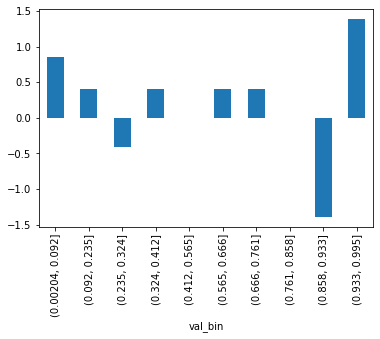

In [108]:
 woe_continous(data=f,y='y',features=['val'],bins=10,min_per_threshold =5)[0]['val']['mean'].plot.bar()